## Basic analysis of the extracted data for each parcel (plot) of the rice data (observed in field data vs observed satellite data)

Considerations:

1. I must NOT forget that this is based on the average pixel value of the plots for each scene, both from PlanetScope and Sentinel-1.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cropdata and Planet satellite data
planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name = 'Sheet2') # This is the 'Results\output_indices_planet.csv' ordered
crop_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/crop_register.xlsx',  sheet_name = 'Sheet2') 


ImportError: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).

In [ ]:
%pip uninstall openpyxl
%pip install openpyxl


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the SAR data
SAR_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Sentinel_1_data.xlsx', sheet_name = 'Sheet2') # # This is the 'Results\output_indices_sentinel_1.csv' ordered

In [15]:
SAR_data.head()

,location_id,image_date,Stokes2_DoLP,Stokes2_LPR,Stokes2_Phi,Stokes2_Tau,Stokes2_g0,Stokes2_g1,Stokes2_g2,Stokes2_g3,...,Stokes2_l2,alpha,area_ha,area_m2,entropy,entropy_shannon,entropy_shannon_norm,polygon_id,span,geometry
0,3,2022-07-04,0.686227,0.186234,-0.609429,-0.348200,0.087751,0.060210,-0.001278,-0.000715,...,0.013759,14.636706,0.0140,140.182,0.626634,-2.600800,0.528639,1,0.091210,"{'type': 'Polygon', 'coordinates': [[[-16.4519..."
1,4,2022-07-04,0.544197,0.314253,-8.160312,-3.236142,0.153199,0.079947,-0.023395,-0.009389,...,0.034557,25.173624,0.0454,587.821,0.769704,-1.208949,0.818639,2,0.123503,"{'type': 'Polygon', 'coordinates': [[[-16.4489..."
2,1,2022-07-04,0.571070,0.278899,-2.987174,2.377644,0.087572,0.049622,-0.005814,0.003623,...,0.018504,22.286879,0.0417,417.453,0.745245,-2.379428,0.574763,3,0.075529,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."
3,5,2022-07-04,0.713958,0.174485,4.978651,2.187706,0.169132,0.119033,0.020656,0.009708,...,0.023904,16.741130,0.1239,1239.167,0.588645,-1.382534,0.782471,4,0.176967,"{'type': 'Polygon', 'coordinates': [[[-16.4402..."
4,2,2022-07-04,0.639992,0.223701,-3.506021,3.526223,0.148444,0.094283,-0.011515,0.011561,...,0.026245,19.178743,0.1210,1209.867,0.673271,-1.456176,0.767127,5,0.157487,"{'type': 'Polygon', 'coordinates': [[[-16.4446..."


In [16]:
crop_data.head()

,crop_register_id,location_id,site_id,farmer_id,type_variety_id,variety_id,estado_fenologico,fecha_siembra,fecha_trasplante,fecha_cosecha,fecha_medicion,dias_despues_siembra,n_plantas,peso_fresco,peso_fresco_planta,peso_seco,peso_seco_planta,long_raiz,altura_planta,leaf_area_index
0,1.0,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-08-10,1.0,1.0,0.10,0.100,0.10,0.100,1.0,1,0.00
1,2.0,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-09-28,48.0,5.0,9.36,1.872,1.65,0.330,17.0,49,0.14
2,3.0,1,1,1,1,1,V2,2022-08-10,2022-09-27,2022-11-30,2022-10-10,60.0,5.0,32.10,6.420,3.97,0.794,19.0,53,0.35
3,4.0,1,1,1,1,1,Prenha/V3,2022-08-10,2022-09-27,2022-11-30,2022-10-19,69.0,5.0,70.19,14.038,8.46,1.692,30.0,66,0.71
4,NaN,1,1,1,1,1,Floracion,2022-08-10,2022-09-27,2022-11-30,2022-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN


## View temporary plots with planting date marking and in relation to the calendar

### PlanetScope case

*Location of plot 1*

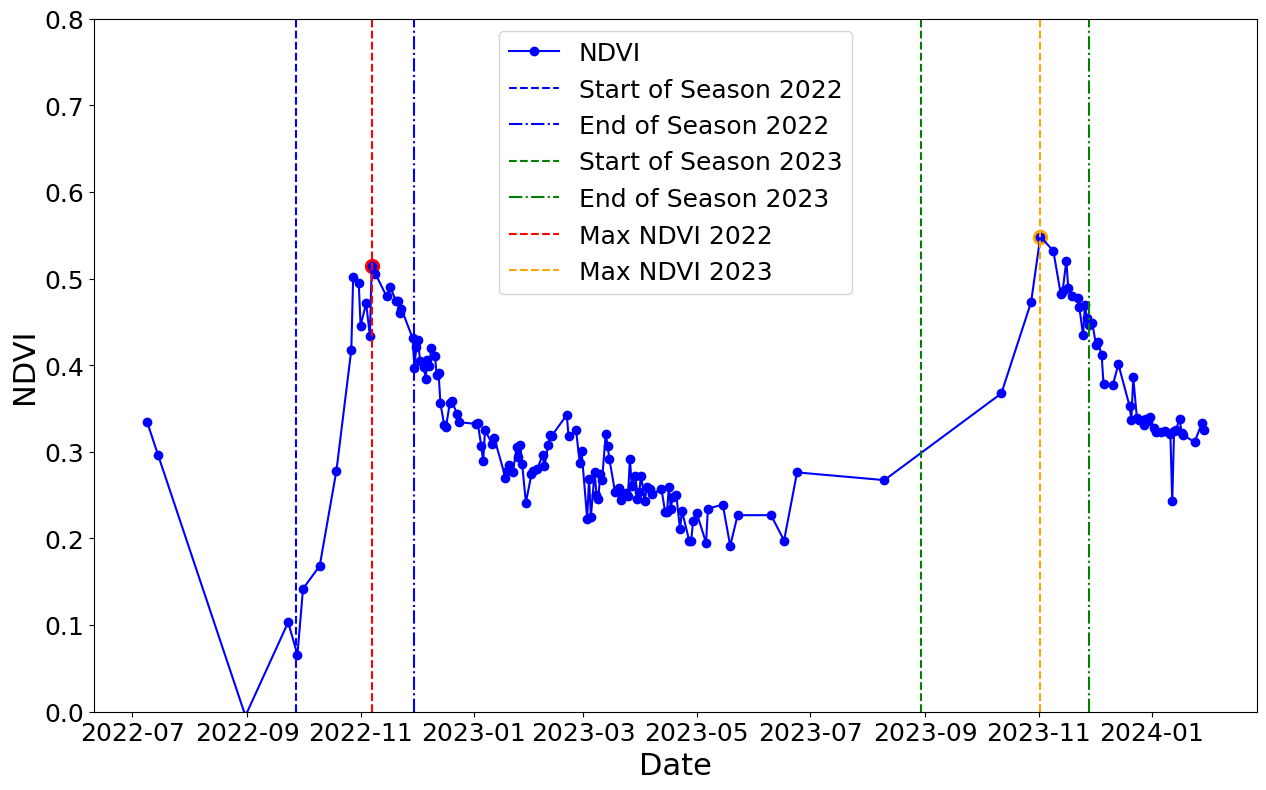

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date columns to datetime if they aren't already
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter data by 'location_id'
location_id = 1
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Define start and end dates for the 2022 and 2023 seasons based on 'crop_data'
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filter 'planet_data' for the specific location
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filter data for each year
data_2022 = planet_data_location[planet_data_location['image_date'].dt.year == 2022]
data_2023 = planet_data_location[planet_data_location['image_date'].dt.year == 2023]

# Identify the date with the maximum NDVI value for each year
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Plot the results
plt.figure(figsize=(15, 9))

# Full NDVI time series
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Mark the start and end dates of the 2022 season
plt.axvline(x=start_date_2022, color='blue', linestyle='--', linewidth=1.5, label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', linewidth=1.5, label='End of Season 2022')

# Mark the start and end dates of the 2023 season
plt.axvline(x=start_date_2023, color='green', linestyle='--', linewidth=1.5, label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', linewidth=1.5, label='End of Season 2023')

# Mark the maximum NDVI in 2022
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', linewidth=1.5, label='Max NDVI 2022')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red', s=100)

# Mark the maximum NDVI in 2023
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', linewidth=1.5, label='Max NDVI 2023')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange', s=100)

# Labels and legend
plt.title('')
plt.xlabel('Date', fontsize=22)
plt.ylabel('NDVI', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# Adjust the y-axis
plt.ylim(0, 0.8)

plt.grid(False)
plt.show()


*Localización del lote 2*

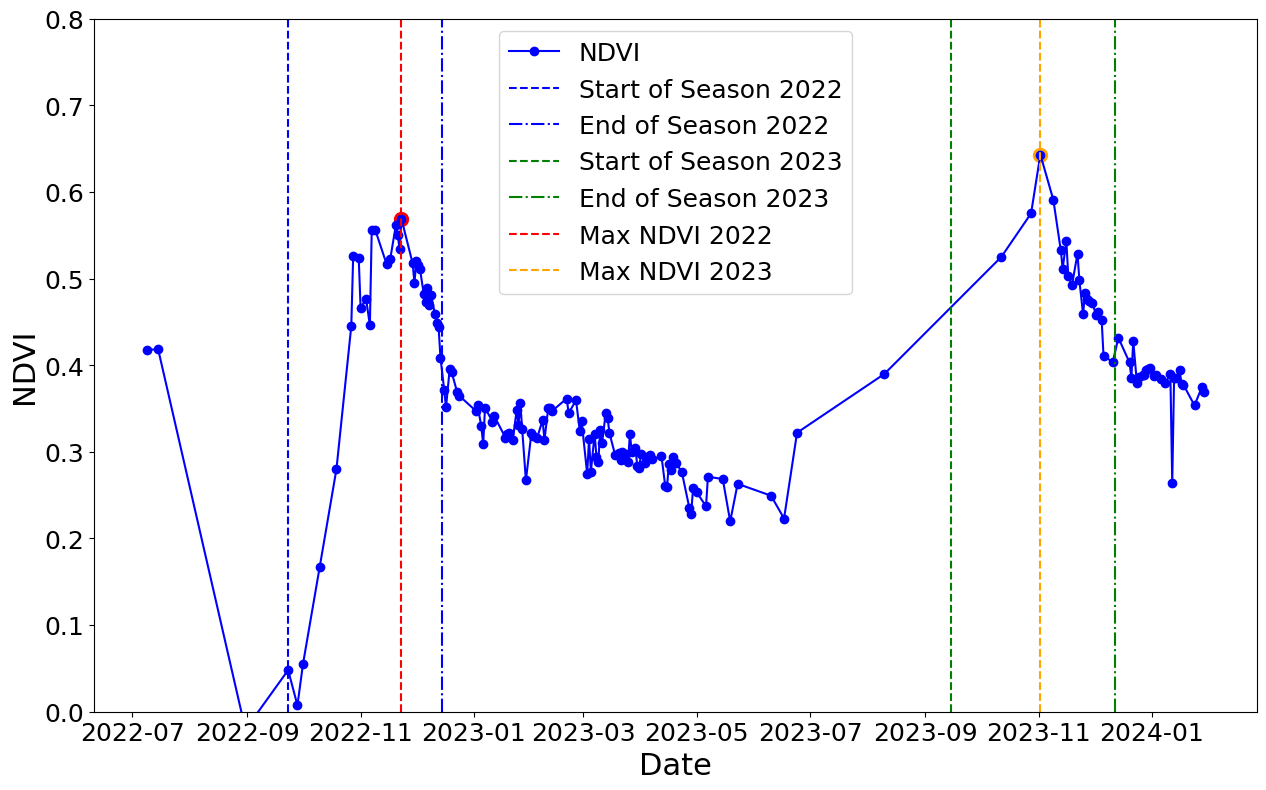

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from an Excel file
planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name='Sheet2')

# Ensure date columns are in datetime format
planet_data['image_date'] = pd.to_datetime(planet_data['image_date'], errors='coerce')
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter data for a specific location (location_id)
location_id = 2
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Define the start and end dates of the season for 2022 and 2023
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filter Planet data for the same location
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filter data by year
data_2022 = planet_data_location[planet_data_location['image_date'].dt.year == 2022]
data_2023 = planet_data_location[planet_data_location['image_date'].dt.year == 2023]

# Identify the date with the maximum NDVI value for each year
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Plot the results
plt.figure(figsize=(15, 9))

# Plot the complete NDVI series
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Mark the start and end dates of the season for 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', linewidth=1.5, label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', linewidth=1.5, label='End of Season 2022')

# Mark the start and end dates of the season for 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', linewidth=1.5, label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', linewidth=1.5, label='End of Season 2023')

# Mark the maximum NDVI for 2022
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', linewidth=1.5, label='Max NDVI 2022')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red', s=100)

# Mark the maximum NDVI for 2023
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', linewidth=1.5, label='Max NDVI 2023')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange', s=100)

# Add labels and legend
plt.title('', fontsize=24)
plt.xlabel('Date', fontsize=22)
plt.ylabel('NDVI', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# Adjust the Y-axis range
plt.ylim(0, 0.8)

plt.grid(False)
plt.show()



*Localización del lote 3*

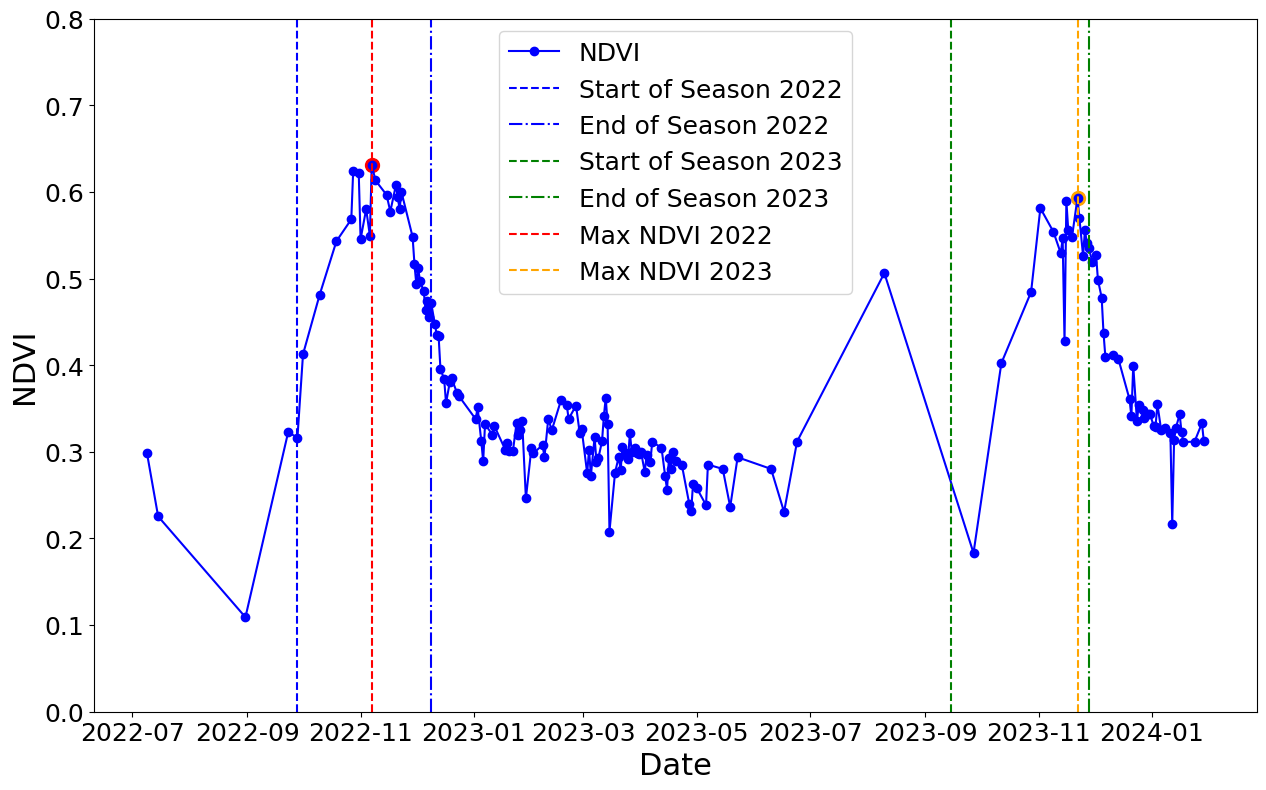

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from an Excel file
planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name='Sheet2')

# Ensure date columns are in datetime format if not already
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter data by 'location_id'
location_id = 3
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Define the start and end dates of the season for 2022 and 2023 based on 'crop_data'
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filter 'planet_data' for the specific location
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filter data for each year
data_2022 = planet_data_location[planet_data_location['image_date'].dt.year == 2022]
data_2023 = planet_data_location[planet_data_location['image_date'].dt.year == 2023]

# Identify the date with the maximum NDVI value for each year
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Plot the results
plt.figure(figsize=(15, 9))

# Plot the complete NDVI series
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Mark the start and end dates of the season for 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', linewidth=1.5, label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', linewidth=1.5, label='End of Season 2022')

# Mark the start and end dates of the season for 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', linewidth=1.5, label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', linewidth=1.5, label='End of Season 2023')

# Mark the maximum NDVI in 2022
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', linewidth=1.5, label='Max NDVI 2022')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red', s=100)

# Mark the maximum NDVI in 2023
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', linewidth=1.5, label='Max NDVI 2023')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange', s=100)

# Add labels and legend
plt.title('', fontsize=22)
plt.xlabel('Date', fontsize=22)
plt.ylabel('NDVI', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# Adjust Y-axis range
plt.ylim(0, 0.8)

plt.grid(False)
plt.show()


*Localización del lote 4*

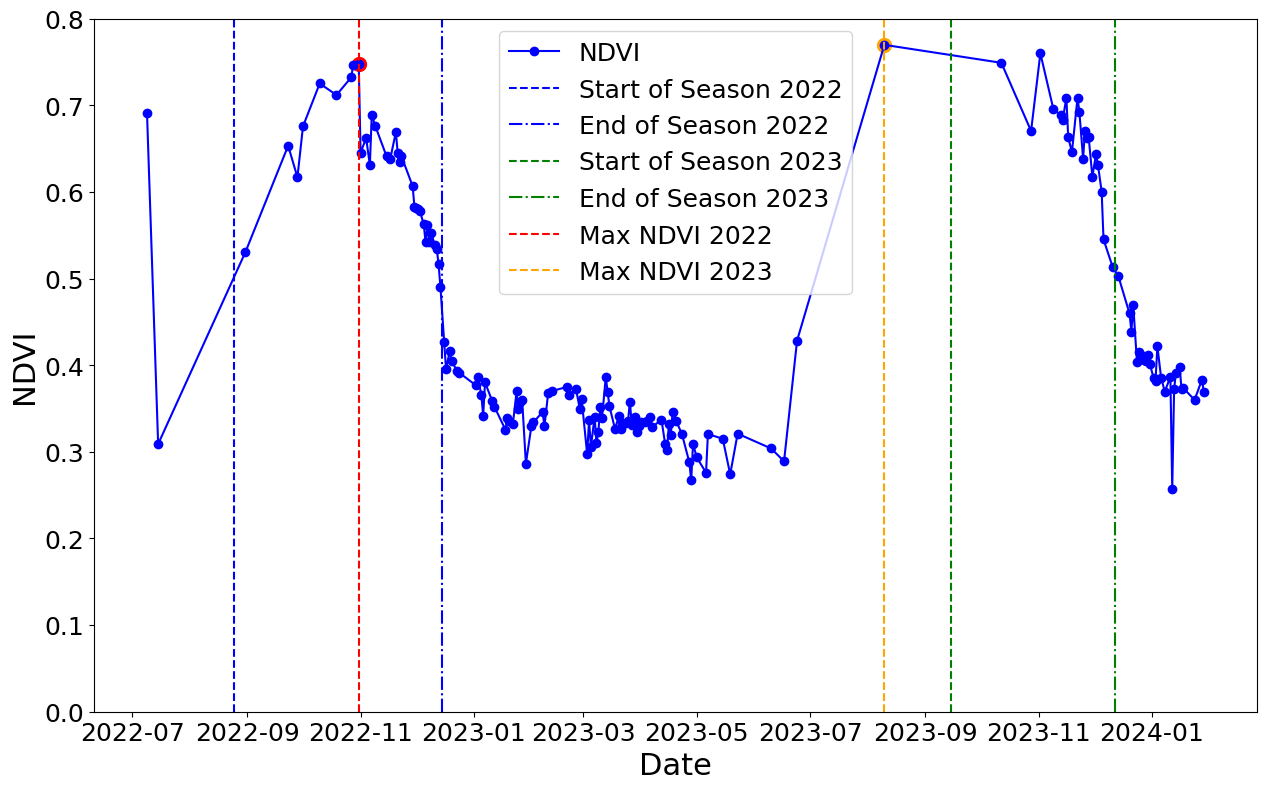

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from an Excel file
planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name='Sheet2')

# Ensure date columns are in datetime format if not already
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter data by 'location_id'
location_id = 4
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Define the start and end dates of the season for 2022 and 2023 based on 'crop_data'
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filter 'planet_data' for the specific location
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filter data for each year
data_2022 = planet_data_location[planet_data_location['image_date'].dt.year == 2022]
data_2023 = planet_data_location[planet_data_location['image_date'].dt.year == 2023]

# Identify the date with the maximum NDVI value for each year
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Plot the results
plt.figure(figsize=(15, 9))

# Plot the complete NDVI series
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Mark the start and end dates of the season for 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', linewidth=1.5, label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', linewidth=1.5, label='End of Season 2022')

# Mark the start and end dates of the season for 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', linewidth=1.5, label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', linewidth=1.5, label='End of Season 2023')

# Mark the maximum NDVI in 2022
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', linewidth=1.5, label='Max NDVI 2022')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red', s=100)

# Mark the maximum NDVI in 2023
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', linewidth=1.5, label='Max NDVI 2023')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange', s=100)

# Add labels and legend
plt.title('', fontsize=22)
plt.xlabel('Date', fontsize=22)
plt.ylabel('NDVI', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# Adjust Y-axis range
plt.ylim(0, 0.8)

plt.grid(False)
plt.show()


*Localización del lote 5*

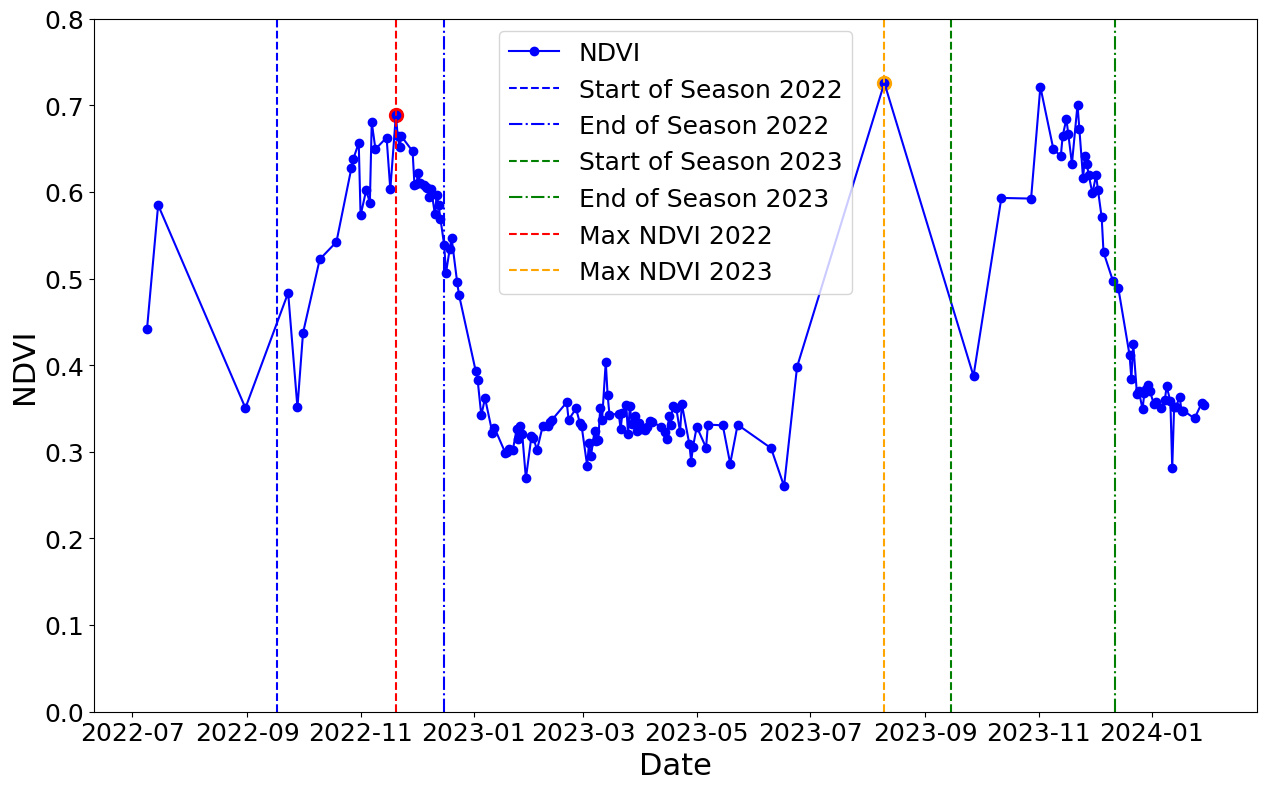

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from an Excel file
planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name='Sheet2')

# Ensure date columns are in datetime format if not already
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter data by 'location_id'
location_id = 5
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Define the start and end dates of the season for 2022 and 2023 based on 'crop_data'
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filter 'planet_data' for the specific location
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filter data for each year
data_2022 = planet_data_location[planet_data_location['image_date'].dt.year == 2022]
data_2023 = planet_data_location[planet_data_location['image_date'].dt.year == 2023]

# Identify the date with the maximum NDVI value for each year
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Plot the results
plt.figure(figsize=(15, 9))

# Plot the complete NDVI series
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Mark the start and end dates of the season for 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', linewidth=1.5, label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', linewidth=1.5, label='End of Season 2022')

# Mark the start and end dates of the season for 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', linewidth=1.5, label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', linewidth=1.5, label='End of Season 2023')

# Mark the maximum NDVI in 2022
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', linewidth=1.5, label='Max NDVI 2022')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red', s=100)

# Mark the maximum NDVI in 2023
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', linewidth=1.5, label='Max NDVI 2023')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange', s=100)

# Add labels and legend
plt.title('', fontsize=22)
plt.xlabel('Date', fontsize=22)
plt.ylabel('NDVI', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# Adjust Y-axis range
plt.ylim(0, 0.8)

plt.grid(False)
plt.show()


In [24]:
import pandas as pd
import numpy as np

# Convert date columns to datetime if they are not already
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')
planet_data['image_date'] = pd.to_datetime(planet_data['image_date'], errors='coerce')

# Filter only NDVI data for the 5 locations
locations = planet_data['location_id'].unique()[:5]  # Get the first 5 available locations

# Create a list to store the results
results = []

# Loop through each location
for location_id in locations:
    # Filter data by 'location_id'
    crop_data_location = crop_data[crop_data['location_id'] == location_id]
    planet_data_location = planet_data[planet_data['location_id'] == location_id]

    # Loop through each year in transplant and harvest data
    for year in [2022, 2023]:
        # Transplant and harvest dates for the specific year
        start_date = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == year]['fecha_trasplante'].iloc[0]
        end_date = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == year]['fecha_cosecha'].iloc[0]

        # Filter NDVI data for that date range
        data_year = planet_data_location[(planet_data_location['image_date'] >= start_date) & 
                                          (planet_data_location['image_date'] <= end_date)]

        # Calculate NDVI for the closest transplant and harvest dates
        ndvi_at_transplant = data_year.loc[np.abs(data_year['image_date'] - start_date).idxmin(), 'NDVI']
        ndvi_at_harvest = data_year.loc[np.abs(data_year['image_date'] - end_date).idxmin(), 'NDVI']

        # Calculate the maximum NDVI value in that period and its date
        max_ndvi_date = data_year.loc[data_year['NDVI'].idxmax(), 'image_date']
        max_ndvi_value = data_year['NDVI'].max()

        # Add results to the DataFrame
        results.append({
            'location_id': location_id,
            'year': year,
            'start_date': start_date,
            'end_date': end_date,
            'NDVI_at_transplant': ndvi_at_transplant,
            'NDVI_at_harvest': ndvi_at_harvest,
            'max_NDVI_date': max_ndvi_date,
            'max_NDVI_value': max_ndvi_value
        })

# Create a DataFrame from the results
ndvi_summary_df = pd.DataFrame(results)

# Display the resulting DataFrame
print(ndvi_summary_df)


   location_id  year start_date   end_date  NDVI_at_transplant  \
0            3  2022 2022-09-28 2022-12-09            0.316436   
1            3  2023 2023-09-15 2023-11-28            0.183224   
2            4  2022 2022-08-25 2022-12-15            0.530623   
3            4  2023 2023-09-15 2023-12-12            0.749112   
4            1  2022 2022-09-27 2022-11-30            0.065807   
5            1  2023 2023-08-30 2023-11-28            0.367502   
6            5  2022 2022-09-17 2022-12-16            0.483586   
7            5  2023 2023-09-15 2023-12-12            0.387556   
8            2  2022 2022-09-23 2022-12-15            0.048029   
9            2  2023 2023-09-15 2023-12-12            0.525090   

   NDVI_at_harvest max_NDVI_date  max_NDVI_value  
0         0.471962    2022-11-07        0.631648  
1         0.535087    2023-11-22        0.593431  
2         0.489978    2022-10-31        0.747178  
3         0.512932    2023-11-02        0.760028  
4         0.397043

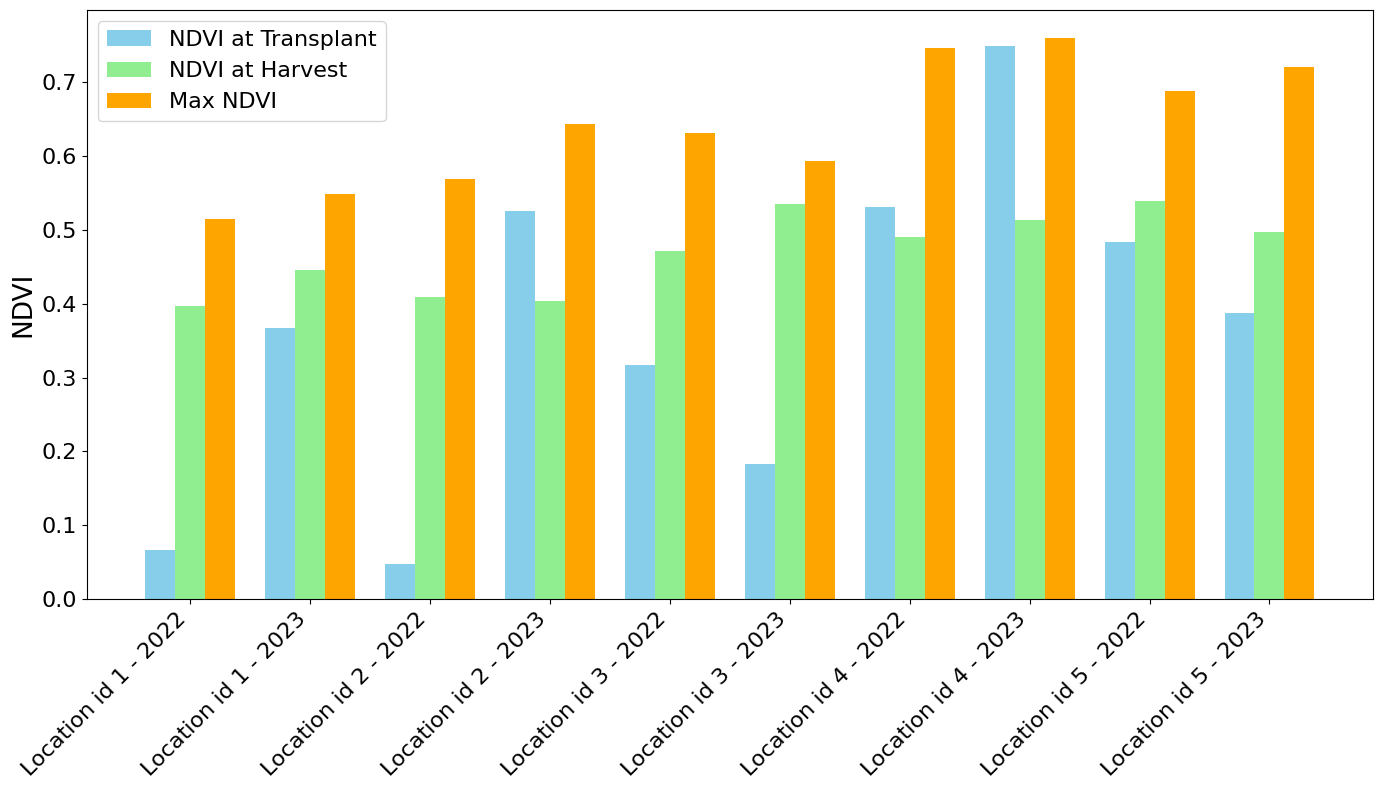

In [44]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'location_id' and 'year' in ascending order
ndvi_summary_df = ndvi_summary_df.sort_values(by=['location_id', 'year'])

# Prepare the data for the plot
x_labels = [f'Location id {row["location_id"]} - {row["year"]}' for _, row in ndvi_summary_df.iterrows()]
x = range(len(x_labels))
width = 0.25  # Width of the bars

# Configure the plot size
plt.figure(figsize=(14, 8))

# Plot the bars for NDVI at Transplant, NDVI at Harvest, and Max NDVI
plt.bar([pos - width for pos in x], ndvi_summary_df['NDVI_at_transplant'], width, label='NDVI at Transplant', color='skyblue')
plt.bar(x, ndvi_summary_df['NDVI_at_harvest'], width, label='NDVI at Harvest', color='lightgreen')
plt.bar([pos + width for pos in x], ndvi_summary_df['max_NDVI_value'], width, label='Max NDVI', color='orange')

# Configure labels and legend
plt.xticks(x, x_labels, rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)  # Adjust font size for y-ticks
plt.ylabel('NDVI', fontsize=19)
plt.title('', fontsize=20)  # Add a title and adjust font size
plt.legend(fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### Sentinel-1 case

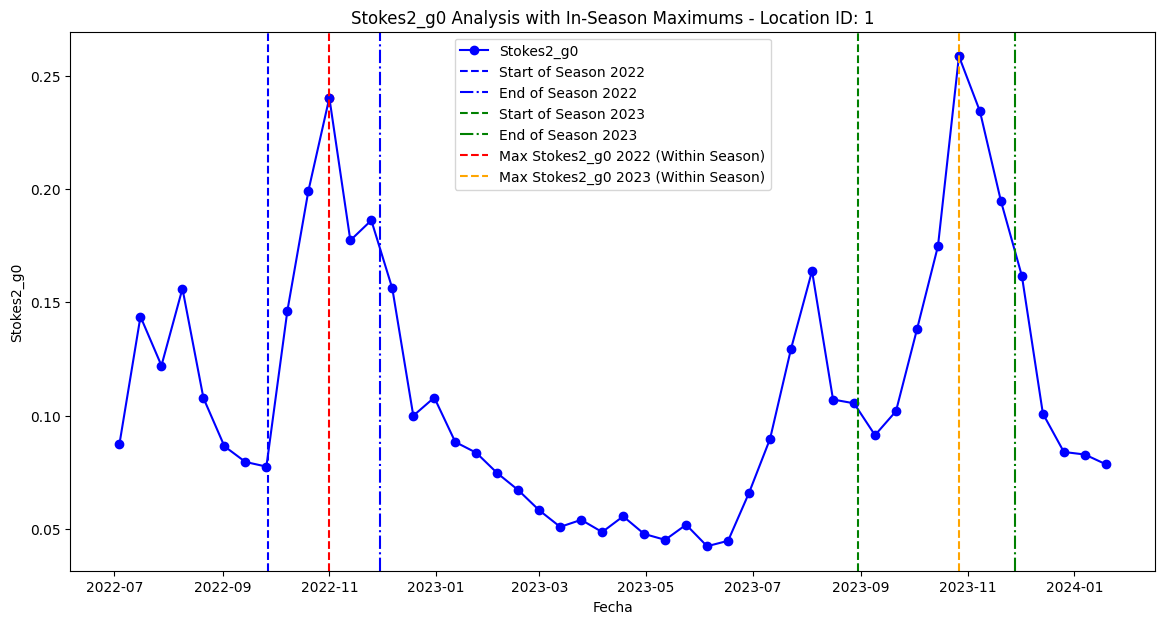

In [26]:
SAR_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Sentinel_1_data.xlsx', sheet_name='Sheet2')

# Ensure date columns are in datetime format
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter data by 'location_id'
location_id = 1
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Define start and end dates of the season for 2022 and 2023
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filter 'SAR_data' for the specific location
SAR_data_location = SAR_data[SAR_data['location_id'] == location_id]

# Filter NDVI data only between transplant and harvest for 2022
data_2022 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2022) & 
                              (SAR_data_location['image_date'] <= end_date_2022)]

# Filter NDVI data only between transplant and harvest for 2023
data_2023 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2023) & 
                              (SAR_data_location['image_date'] <= end_date_2023)]

# Identify the date with the maximum Stokes2_g0 value for each year within the growing period
max_Stokes2_g0_date_2022 = data_2022.loc[data_2022['Stokes2_g0'].idxmax(), 'image_date']
max_Stokes2_g0_value_2022 = data_2022['Stokes2_g0'].max()

max_Stokes2_g0_date_2023 = data_2023.loc[data_2023['Stokes2_g0'].idxmax(), 'image_date']
max_Stokes2_g0_value_2023 = data_2023['Stokes2_g0'].max()

# Plot the results
plt.figure(figsize=(14, 7))

# Complete Stokes2_g0 Series
plt.plot(SAR_data_location['image_date'], SAR_data_location['Stokes2_g0'], label='Stokes2_g0', color='blue', marker='o')

# Mark start and end dates of the season for 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

# Mark start and end dates of the season for 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

# Mark the maximum Stokes2_g0 in 2022 within the growing period
plt.axvline(x=max_Stokes2_g0_date_2022, color='red', linestyle='--', label='Max Stokes2_g0 2022 (Within Season)')
plt.scatter(max_Stokes2_g0_date_2022, max_Stokes2_g0_value_2022, color='red')

# Mark the maximum Stokes2_g0 in 2023 within the growing period
plt.axvline(x=max_Stokes2_g0_date_2023, color='orange', linestyle='--', label='Max Stokes2_g0 2023 (Within Season)')
plt.scatter(max_Stokes2_g0_date_2023, max_Stokes2_g0_value_2023, color='orange')

# Labels and legend
plt.title(f'Stokes2_g0 Analysis with In-Season Maximums - Location ID: {location_id}')
plt.xlabel('Date')
plt.ylabel('Stokes2_g0')
plt.legend()
plt.grid(False)
plt.show()


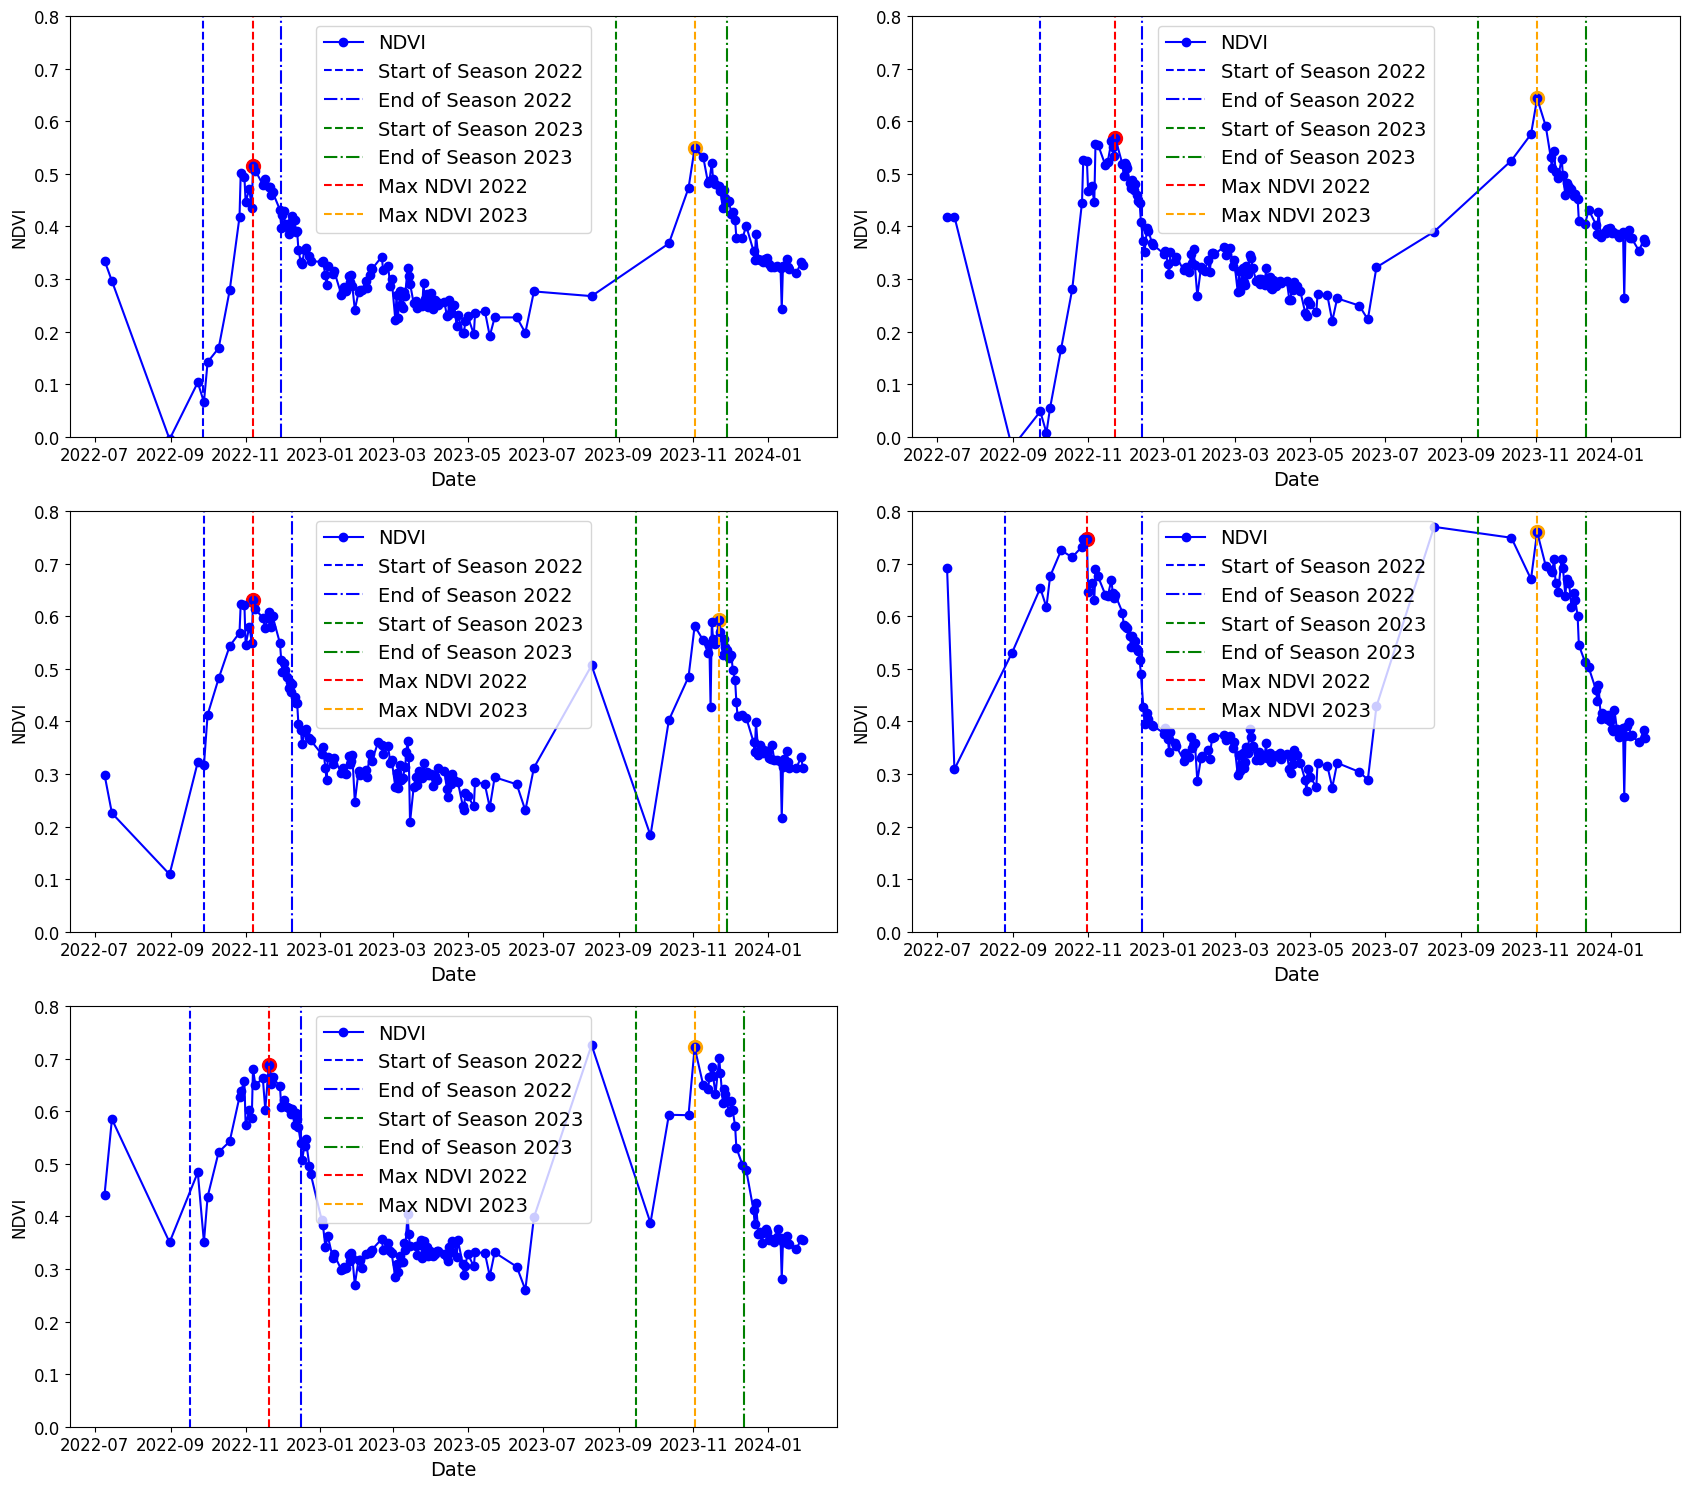

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date columns to datetime if they are not already
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter only NDVI data and sort locations by `location_id` in ascending order
locations = sorted(planet_data['location_id'].unique()[:5])  # Sort location_id in ascending order

# Configure the figure for the plots
fig, axes = plt.subplots(3, 2, figsize=(17, 15))  # 3 rows and 2 columns to display 5 plots (leaving one empty)
axes = axes.flatten()

# Loop to plot 'NDVI' for each location in ascending order
for i, location_id in enumerate(locations):
    # Filter data by 'location_id'
    crop_data_location = crop_data[crop_data['location_id'] == location_id]
    planet_data_location = planet_data[planet_data['location_id'] == location_id]

    # Define the start and end dates of the season for 2022 and 2023
    start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
    end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

    start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
    end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

    # Filter NDVI data only between transplant and harvest for 2022 and 2023
    data_2022 = planet_data_location[(planet_data_location['image_date'] >= start_date_2022) & 
                                     (planet_data_location['image_date'] <= end_date_2022)]
    data_2023 = planet_data_location[(planet_data_location['image_date'] >= start_date_2023) & 
                                     (planet_data_location['image_date'] <= end_date_2023)]

    # Identify the date with the maximum NDVI value for each year
    max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
    max_ndvi_value_2022 = data_2022['NDVI'].max()

    max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
    max_ndvi_value_2023 = data_2023['NDVI'].max()

    # Plot the results in the corresponding subplot
    ax = axes[i]
    ax.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

    # Mark the start and end dates of the season for 2022
    ax.axvline(x=start_date_2022, color='blue', linestyle='--', linewidth=1.5, label='Start of Season 2022')
    ax.axvline(x=end_date_2022, color='blue', linestyle='-.', linewidth=1.5, label='End of Season 2022')

    # Mark the start and end dates of the season for 2023
    ax.axvline(x=start_date_2023, color='green', linestyle='--', linewidth=1.5, label='Start of Season 2023')
    ax.axvline(x=end_date_2023, color='green', linestyle='-.', linewidth=1.5, label='End of Season 2023')

    # Mark the maximum NDVI in 2022
    ax.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', linewidth=1.5, label='Max NDVI 2022')
    ax.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red', s=100)

    # Mark the maximum NDVI in 2023
    ax.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', linewidth=1.5, label='Max NDVI 2023')
    ax.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange', s=100)

    # Labels and legend
    ax.set_title('', fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('NDVI', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(fontsize=14)

    # Adjust the Y-axis
    ax.set_ylim(0, 0.8)
    ax.grid(False)

# Hide any empty subplots
for j in range(len(locations), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Complete plots

##### Planet case

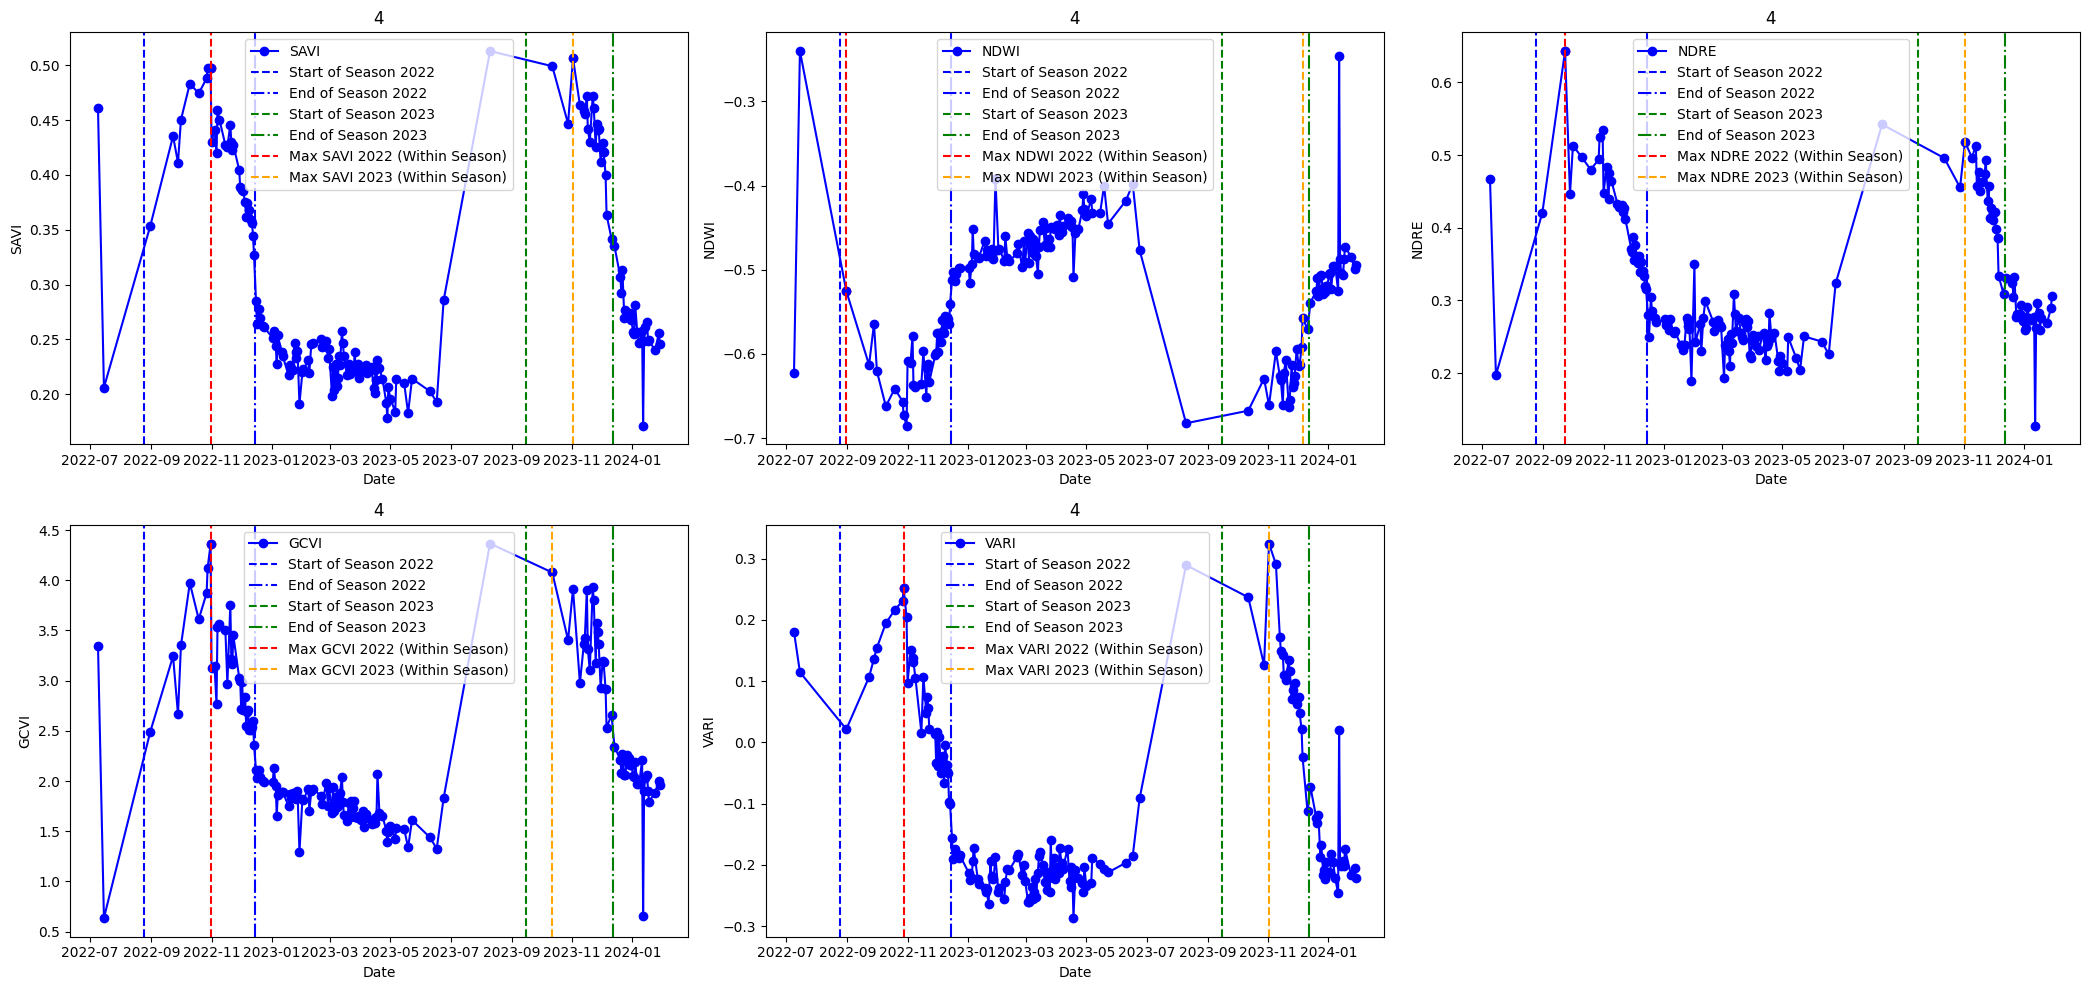

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date columns are in datetime format
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter data by 'location_id'
location_id = 4
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Define the start and end dates of the season for 2022 and 2023
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filter 'planet_data' for the specific location
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# List of indices to plot
indices = ['SAVI', 'NDWI', 'NDRE', 'GCVI', 'VARI']  # Add all the indices you want to plot here

# Configure the number of plots per row
plots_per_row = 3  # Change this number based on the number of plots per row you want

# Calculate the number of rows needed
num_rows = -(-len(indices) // plots_per_row)  # Integer division rounded up

# Adjust the figure size based on the number of rows and columns
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 7, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array into a single array

# Loop to plot each index
for i, index in enumerate(indices):
    # Filter NDVI data only between transplant and harvest for 2022
    data_2022 = planet_data_location[(planet_data_location['image_date'] >= start_date_2022) & 
                                     (planet_data_location['image_date'] <= end_date_2022)]

    # Filter NDVI data only between transplant and harvest for 2023
    data_2023 = planet_data_location[(planet_data_location['image_date'] >= start_date_2023) & 
                                     (planet_data_location['image_date'] <= end_date_2023)]

    # Identify the date with the maximum value of the index for each year within the growth period
    max_value_date_2022 = data_2022.loc[data_2022[index].idxmax(), 'image_date']
    max_value_2022 = data_2022[index].max()

    max_value_date_2023 = data_2023.loc[data_2023[index].idxmax(), 'image_date']
    max_value_2023 = data_2023[index].max()

    # Plot the results in the corresponding subplot
    ax = axes[i]
    ax.plot(planet_data_location['image_date'], planet_data_location[index], label=index, color='blue', marker='o')

    # Mark the start and end dates of the season for 2022
    ax.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
    ax.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

    # Mark the start and end dates of the season for 2023
    ax.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
    ax.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

    # Mark the maximum value of the index in 2022 within the growth period
    ax.axvline(x=max_value_date_2022, color='red', linestyle='--', label=f'Max {index} 2022 (Within Season)')
    ax.scatter(max_value_date_2022, max_value_2022, color='red')

    # Mark the maximum value of the index in 2023 within the growth period
    ax.axvline(x=max_value_date_2023, color='orange', linestyle='--', label=f'Max {index} 2023 (Within Season)')
    ax.scatter(max_value_date_2023, max_value_2023, color='orange')

    # Labels and legend
    ax.set_title(f'Location ID {location_id} - {index}')
    ax.set_xlabel('Date')
    ax.set_ylabel(index)
    ax.legend()
    ax.grid(False)

# If there are empty subplots, hide them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### SAR Case

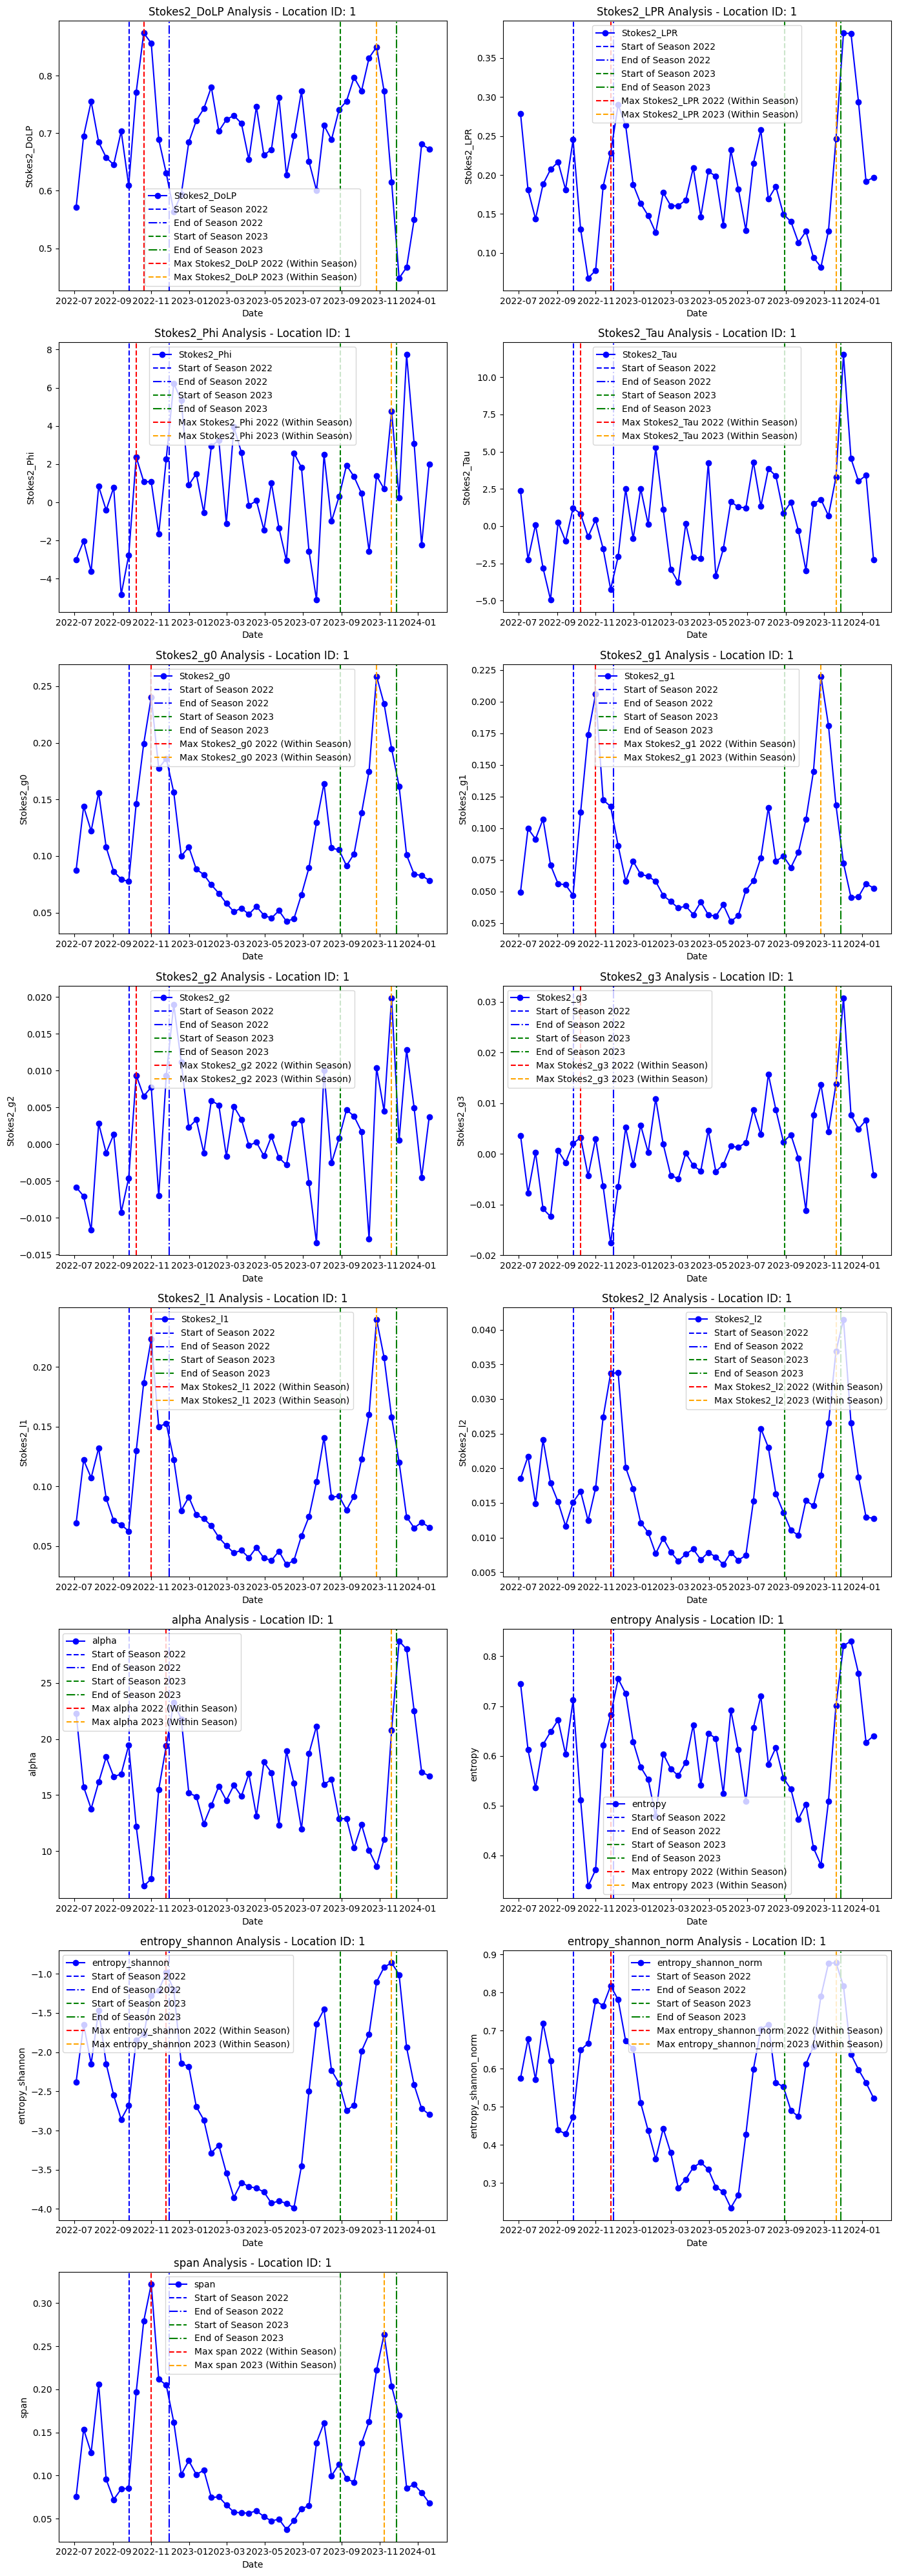

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date columns are in datetime format
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter data by 'location_id'
location_id = 1
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Define the start and end dates of the season for 2022 and 2023
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filter 'SAR_data' for the specific location
SAR_data_location = SAR_data[SAR_data['location_id'] == location_id]

# List of indices to plot
indices = ['Stokes2_DoLP', 'Stokes2_LPR', 'Stokes2_Phi', 'Stokes2_Tau', 'Stokes2_g0', 
           'Stokes2_g1', 'Stokes2_g2', 'Stokes2_g3', 'Stokes2_l1', 'Stokes2_l2', 
           'alpha', 'entropy', 'entropy_shannon', 'entropy_shannon_norm', 'span']  # Add all the indices you want to plot here

# Configure the number of plots per row
plots_per_row = 2  # Change this number based on the number of plots per row you want

# Calculate the number of rows needed
num_rows = -(-len(indices) // plots_per_row)  # Ceiling division

# Adjust the figure size based on the number of rows and columns
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 7, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array into a single array

# Loop to plot each index
for i, index in enumerate(indices):
    # Filter NDVI data only between transplant and harvest for 2022
    data_2022 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2022) & 
                                  (SAR_data_location['image_date'] <= end_date_2022)]

    # Filter NDVI data only between transplant and harvest for 2023
    data_2023 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2023) & 
                                  (SAR_data_location['image_date'] <= end_date_2023)]

    # Identify the date with the maximum value of the index for each year within the growth period
    max_value_date_2022 = data_2022.loc[data_2022[index].idxmax(), 'image_date']
    max_value_2022 = data_2022[index].max()

    max_value_date_2023 = data_2023.loc[data_2023[index].idxmax(), 'image_date']
    max_value_2023 = data_2023[index].max()

    # Plot the results in the corresponding subplot
    ax = axes[i]
    ax.plot(SAR_data_location['image_date'], SAR_data_location[index], label=index, color='blue', marker='o')

    # Mark the start and end dates of the season for 2022
    ax.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
    ax.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

    # Mark the start and end dates of the season for 2023
    ax.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
    ax.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

    # Mark the maximum value of the index in 2022 within the growth period
    ax.axvline(x=max_value_date_2022, color='red', linestyle='--', label=f'Max {index} 2022 (Within Season)')
    ax.scatter(max_value_date_2022, max_value_2022, color='red')

    # Mark the maximum value of the index in 2023 within the growth period
    ax.axvline(x=max_value_date_2023, color='orange', linestyle='--', label=f'Max {index} 2023 (Within Season)')
    ax.scatter(max_value_date_2023, max_value_2023, color='orange')

    # Labels and legend
    ax.set_title(f'{index} Analysis - Location ID: {location_id}')
    ax.set_xlabel('Date')
    ax.set_ylabel(index)
    ax.legend()
    ax.grid(False)

# If there are empty subplots, hide them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


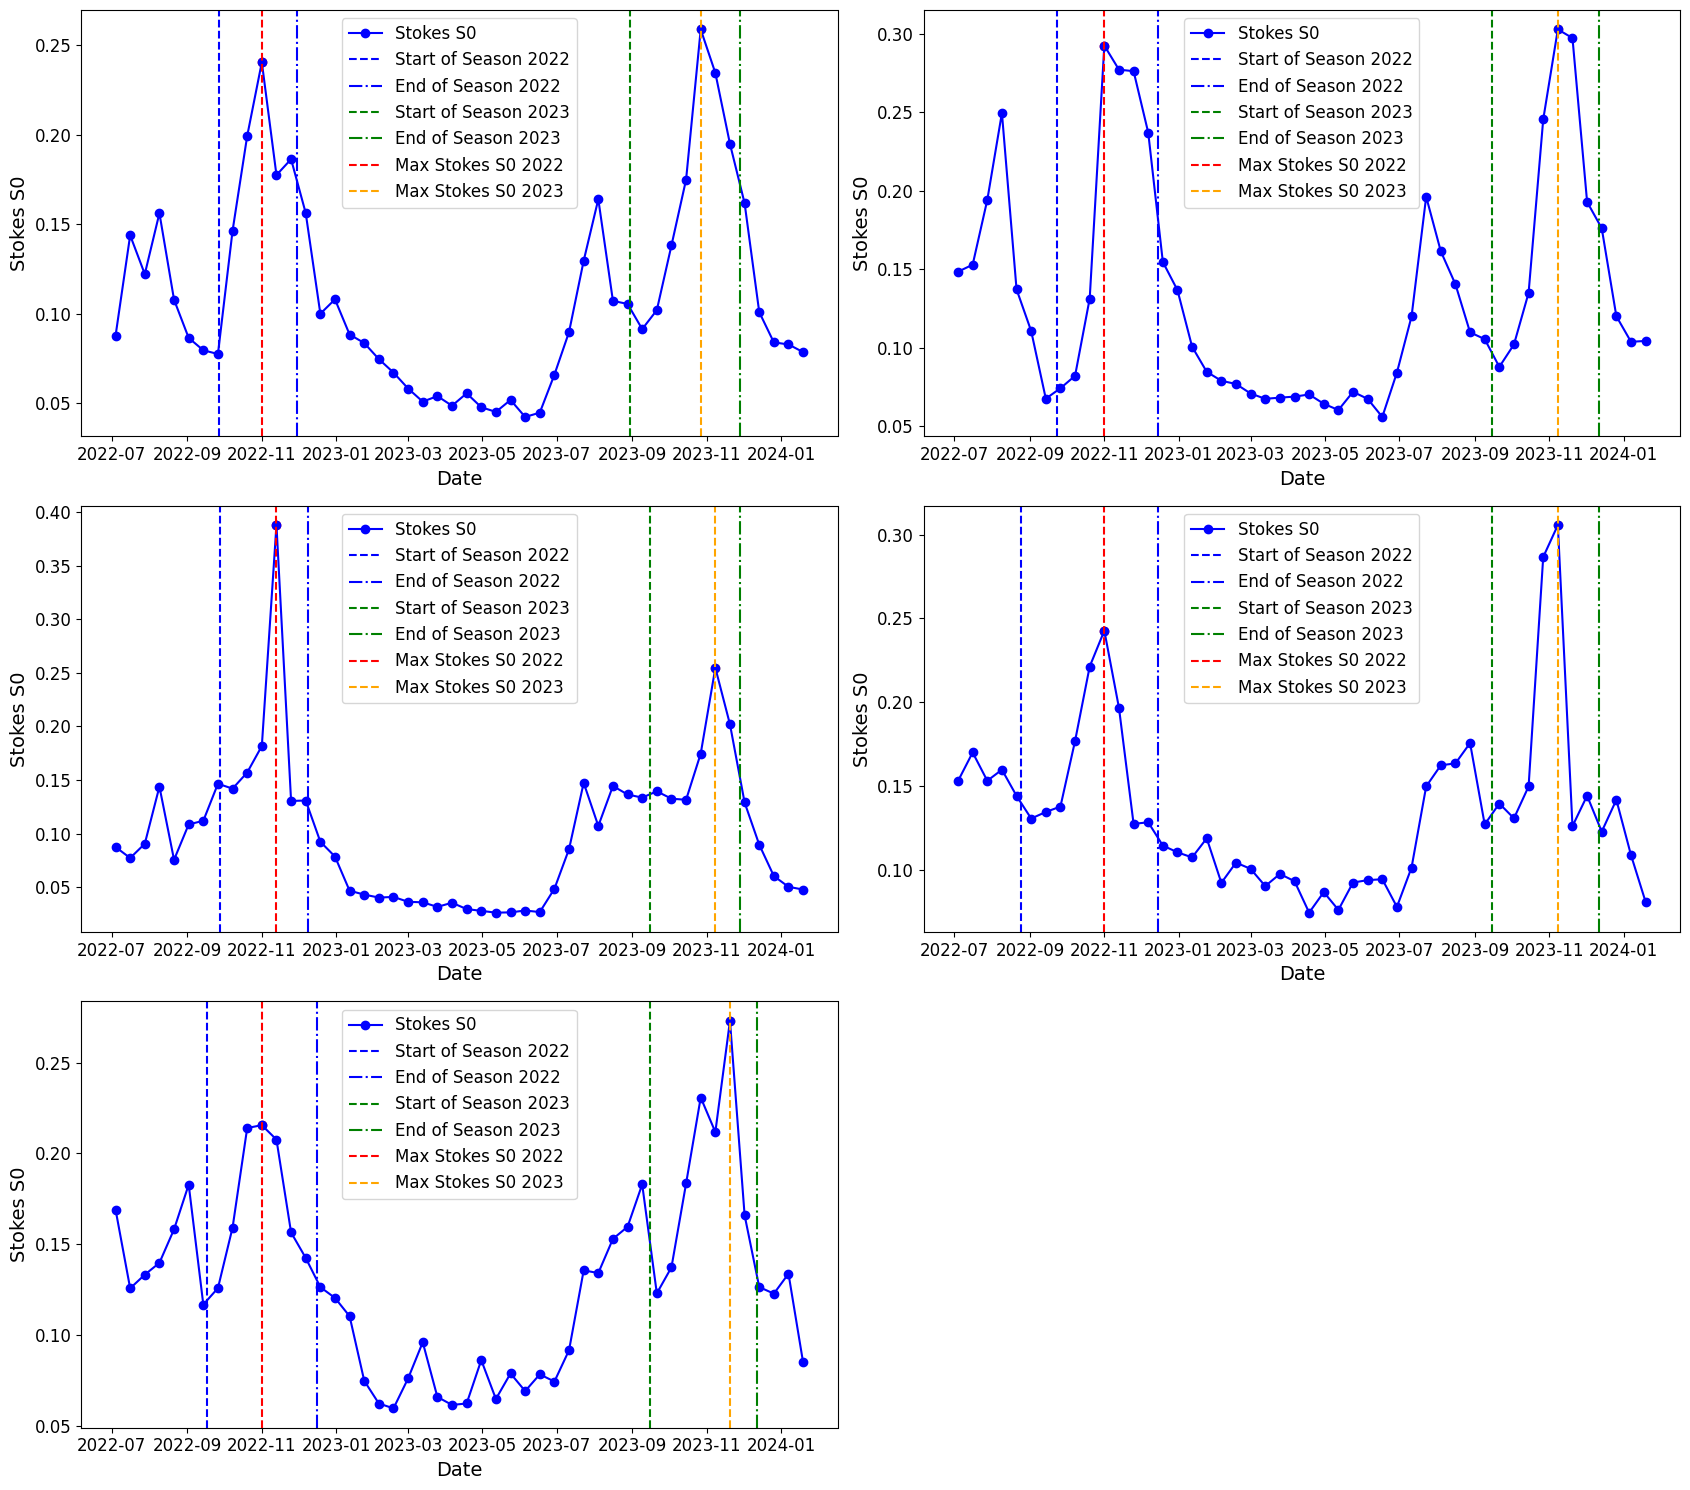

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date columns are in datetime format
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filter only the 'Stokes2_g0' data and sort the first 5 locations by `location_id` in ascending order
locations = sorted(SAR_data['location_id'].unique()[:5])  # Sort location_id in ascending order

# Configure the figure for the plots
fig, axes = plt.subplots(3, 2, figsize=(17, 15))  # 3 rows and 2 columns to display 5 plots (leave one empty)
axes = axes.flatten()

# Loop to plot `Stokes2_g0` for each location in ascending order
for i, location_id in enumerate(locations):
    # Filter data by 'location_id'
    crop_data_location = crop_data[crop_data['location_id'] == location_id]
    SAR_data_location = SAR_data[SAR_data['location_id'] == location_id]

    # Define the start and end dates of the season for 2022 and 2023
    start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
    end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

    start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
    end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

    # Filter 'Stokes2_g0' data only between transplant and harvest for 2022 and 2023
    data_2022 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2022) & 
                                  (SAR_data_location['image_date'] <= end_date_2022)]
    data_2023 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2023) & 
                                  (SAR_data_location['image_date'] <= end_date_2023)]

    # Identify the date with the maximum value of 'Stokes2_g0' for each year
    max_value_date_2022 = data_2022.loc[data_2022['Stokes2_g0'].idxmax(), 'image_date']
    max_value_2022 = data_2022['Stokes2_g0'].max()

    max_value_date_2023 = data_2023.loc[data_2023['Stokes2_g0'].idxmax(), 'image_date']
    max_value_2023 = data_2023['Stokes2_g0'].max()

    # Plot the results in the corresponding subplot
    ax = axes[i]
    ax.plot(SAR_data_location['image_date'], SAR_data_location['Stokes2_g0'], label='Stokes S0', color='blue', marker='o')

    # Mark the start and end dates of the season for 2022 and 2023
    ax.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
    ax.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')
    ax.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
    ax.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

    # Mark the maximum value of 'Stokes2_g0' in 2022 and 2023
    ax.axvline(x=max_value_date_2022, color='red', linestyle='--', label='Max Stokes S0 2022')
    ax.scatter(max_value_date_2022, max_value_2022, color='red')
    ax.axvline(x=max_value_date_2023, color='orange', linestyle='--', label='Max Stokes S0 2023')
    ax.scatter(max_value_date_2023, max_value_2023, color='orange')

    # Labels and legend
    ax.set_title('', fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Stokes S0', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(fontsize=12)
    ax.grid(False)

# If there are empty subplots, hide them
for j in range(len(locations), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [76]:
import pandas as pd
import numpy as np

# Ensure date columns are in datetime format if not already
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Create a list to store the results
results = []

# Loop through each location in ascending order
for location_id in locations:
    # Filter data by 'location_id'
    crop_data_location = crop_data[crop_data['location_id'] == location_id]
    SAR_data_location = SAR_data[SAR_data['location_id'] == location_id]

    # Loop through each year in transplant and harvest data
    for year in [2022, 2023]:
        # Ensure there is data for the current year
        if not crop_data_location[crop_data_location['fecha_trasplante'].dt.year == year].empty:
            # Transplant and harvest dates for the specific year
            start_date = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == year]['fecha_trasplante'].iloc[0]
            end_date = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == year]['fecha_cosecha'].iloc[0]

            # Filter 'Stokes2_g0' data for that date range
            data_year = SAR_data_location[(SAR_data_location['image_date'] >= start_date) & 
                                          (SAR_data_location['image_date'] <= end_date)]

            # Calculate Stokes2_g0 for the nearest transplant and harvest dates
            g0_at_transplant = data_year.loc[np.abs(data_year['image_date'] - start_date).idxmin(), 'Stokes2_g0']
            g0_at_harvest = data_year.loc[np.abs(data_year['image_date'] - end_date).idxmin(), 'Stokes2_g0']

            # Calculate the maximum value of Stokes2_g0 in that period and its date
            max_g0_date = data_year.loc[data_year['Stokes2_g0'].idxmax(), 'image_date']
            max_g0_value = data_year['Stokes2_g0'].max()

            # Add the results to the DataFrame
            results.append({
                'location_id': location_id,
                'year': year,
                'start_date': start_date,
                'end_date': end_date,
                'Stokes2_g0_at_transplant': g0_at_transplant,
                'Stokes2_g0_at_harvest': g0_at_harvest,
                'max_Stokes2_g0_date': max_g0_date,
                'max_Stokes2_g0_value': max_g0_value
            })

# Create a DataFrame from the results
stokes_g0_summary_df = pd.DataFrame(results)

# Display the resulting DataFrame
print(stokes_g0_summary_df)

   location_id  year start_date   end_date  Stokes2_g0_at_transplant  \
0            1  2022 2022-09-27 2022-11-30                  0.146295   
1            1  2023 2023-08-30 2023-11-28                  0.091371   
2            2  2022 2022-09-23 2022-12-15                  0.074155   
3            2  2023 2023-09-15 2023-12-12                  0.087793   
4            3  2022 2022-09-28 2022-12-09                  0.142097   
5            3  2023 2023-09-15 2023-11-28                  0.139606   
6            4  2022 2022-08-25 2022-12-15                  0.130808   
7            4  2023 2023-09-15 2023-12-12                  0.139751   
8            5  2022 2022-09-17 2022-12-16                  0.125866   
9            5  2023 2023-09-15 2023-12-12                  0.122990   

   Stokes2_g0_at_harvest max_Stokes2_g0_date  max_Stokes2_g0_value  
0               0.186235          2022-11-01              0.240360  
1               0.194756          2023-10-27              0.258706  


In [77]:
import pandas as pd

stokes_g0_summary_df = pd.DataFrame({
    'location_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'year': [2022, 2023, 2022, 2023, 2022, 2023, 2022, 2023, 2022, 2023],
    'start_date': ['2022-09-27', '2023-08-30', '2022-09-23', '2023-09-15', '2022-09-28', '2023-09-15', '2022-08-25', '2023-09-15', '2022-09-17', '2023-09-15'],
    'end_date': ['2022-11-30', '2023-11-28', '2022-12-15', '2023-12-12', '2022-12-09', '2023-11-28', '2022-12-15', '2023-12-12', '2022-12-16', '2023-12-12'],
    'Stokes2_g0_at_transplant': [0.146, 0.091, 0.074, 0.088, 0.142, 0.140, 0.131, 0.140, 0.126, 0.123],
    'Stokes2_g0_at_harvest': [0.186, 0.195, 0.237, 0.193, 0.131, 0.202, 0.129, 0.144, 0.143, 0.166],
    'max_Stokes2_g0_date': ['2022-11-01', '2023-10-27', '2022-11-01', '2023-11-08', '2022-11-13', '2023-11-08', '2022-11-01', '2023-11-08', '2022-11-01', '2023-11-20'],
    'max_Stokes2_g0_value': [0.240, 0.259, 0.293, 0.303, 0.388, 0.255, 0.243, 0.306, 0.216, 0.273]
})

print(stokes_g0_summary_df)



   location_id  year  start_date    end_date  Stokes2_g0_at_transplant  \
0            1  2022  2022-09-27  2022-11-30                     0.146   
1            1  2023  2023-08-30  2023-11-28                     0.091   
2            2  2022  2022-09-23  2022-12-15                     0.074   
3            2  2023  2023-09-15  2023-12-12                     0.088   
4            3  2022  2022-09-28  2022-12-09                     0.142   
5            3  2023  2023-09-15  2023-11-28                     0.140   
6            4  2022  2022-08-25  2022-12-15                     0.131   
7            4  2023  2023-09-15  2023-12-12                     0.140   
8            5  2022  2022-09-17  2022-12-16                     0.126   
9            5  2023  2023-09-15  2023-12-12                     0.123   

   Stokes2_g0_at_harvest max_Stokes2_g0_date  max_Stokes2_g0_value  
0                  0.186          2022-11-01                 0.240  
1                  0.195          2023-10-27   

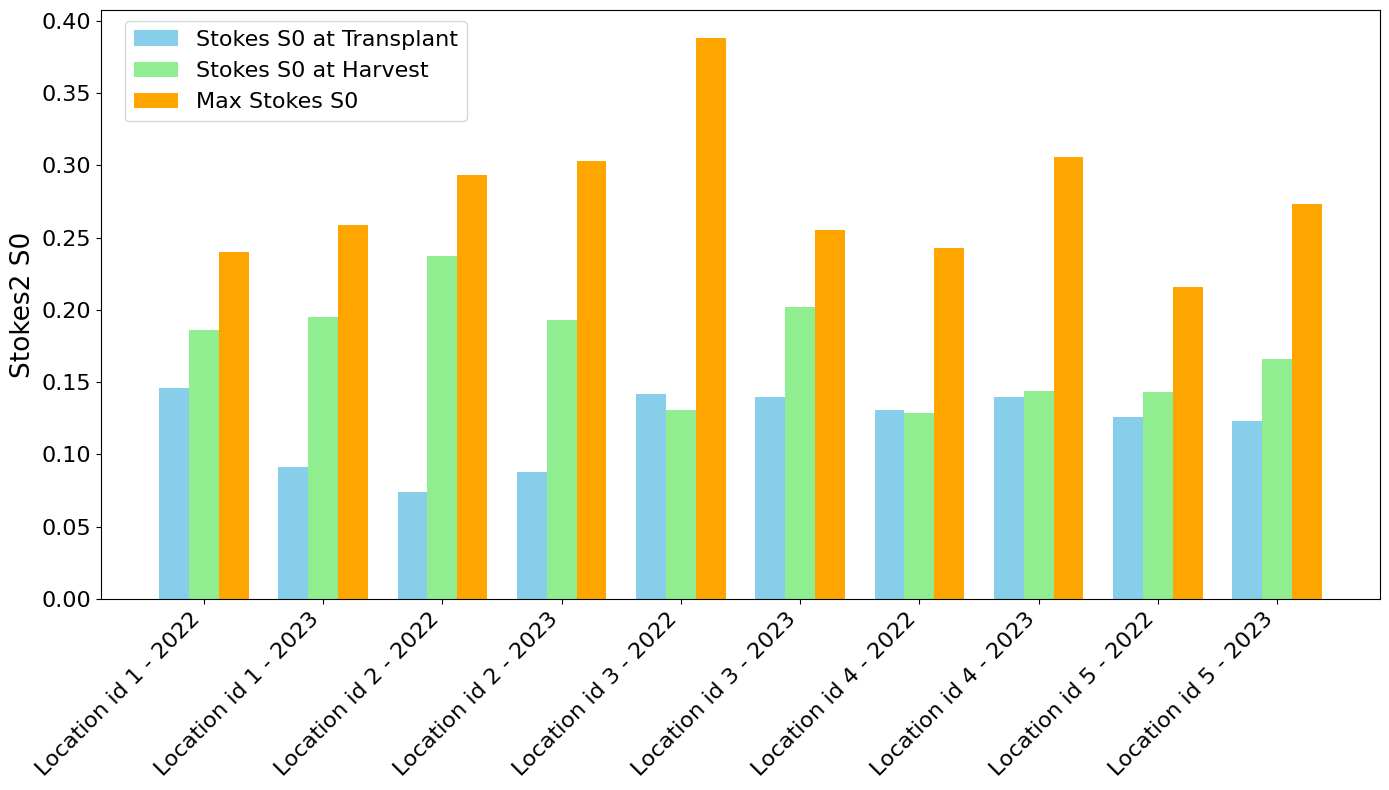

In [81]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Prepare the data for the plot
x_labels = [f'Location id {row["location_id"]} - {row["year"]}' for _, row in stokes_g0_summary_df.iterrows()]
x = range(len(x_labels))
width = 0.25  # Width of the bars

# Plot the bars for Stokes2_g0 at Transplant, Stokes2_g0 at Harvest, and Max Stokes2_g0
plt.bar([pos - width for pos in x], stokes_g0_summary_df['Stokes2_g0_at_transplant'], width, label='Stokes S0 at Transplant', color='skyblue')
plt.bar(x, stokes_g0_summary_df['Stokes2_g0_at_harvest'], width, label='Stokes S0 at Harvest', color='lightgreen')
plt.bar([pos + width for pos in x], stokes_g0_summary_df['max_Stokes2_g0_value'], width, label='Max Stokes S0', color='orange')

# Configure labels and legend
plt.xticks(x, x_labels, rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Stokes2 S0', fontsize=19)
plt.title('', fontsize=16)

# Position the legend to the upper left without overlapping the y-axis
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(0.01, 1))

# Show the plot
plt.tight_layout()
plt.show()


